# Example `beacon_api_eth_v1_events_block` notebook with duckdb

This notebook demonstrates how to query the `beacon_api_eth_v1_events_block` table with SQL using duckdb

`pip install duckdb polars matplotlib`

In [1]:
import duckdb
import polars as pl
from datetime import datetime, timedelta

In [2]:
# start and end date range
start_date = datetime(2024, 4, 1)
end_date = datetime(2024, 4, 3)

# base url endpiont. Replace this with other tables to explore different datasets
base_url = "https://data.ethpandaops.io/xatu/mainnet/databases/default/beacon_api_eth_v1_events_block/"

# list comprehension to generate endpoints
parquet_urls = []
parquet_urls = [
    f"{base_url}{date.year}/{date.month}/{date.day}.parquet"
    for date in (
        start_date + timedelta(days=n) for n in range((end_date - start_date).days + 1)
    )
]

In [3]:
db = duckdb.connect()

In [4]:
dfs = []
for url in parquet_urls:
    # Execute the query
    df = duckdb.sql(
        f"""
        SELECT
            slot_start_date_time,
            MEDIAN(propagation_slot_start_diff) AS median_propagation_slot_start_diff
        FROM
            read_parquet('{url}')
        GROUP BY
            slot_start_date_time
        ORDER BY
            slot_start_date_time;
        """
    ).pl()

    dfs.append(df)

concat_dfs = pl.concat(dfs)

## Perform Analysis
Calculate the median `propagation_slot_start_diff` per `slot_start_date_time` on the combined dataset.

In [5]:
import matplotlib.pyplot as plt

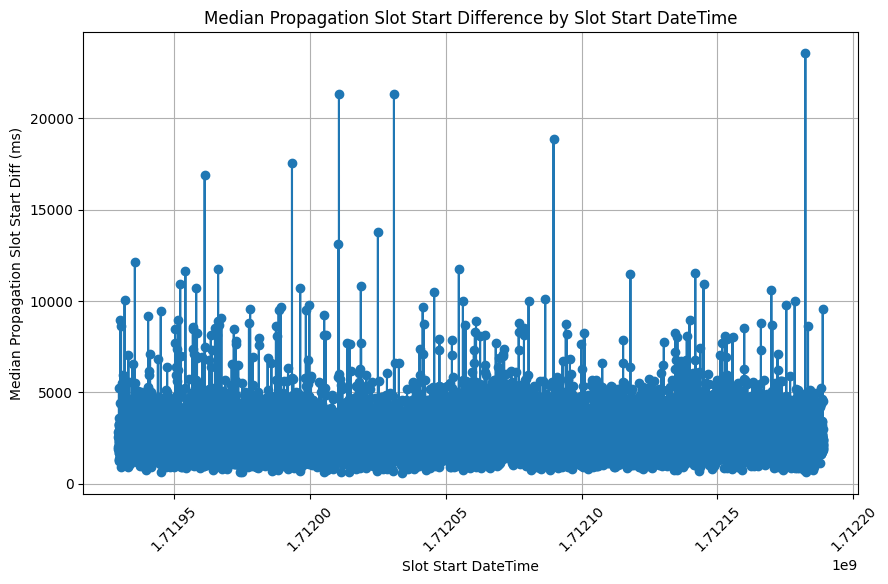

In [6]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(
    concat_dfs["slot_start_date_time"],
    concat_dfs["median_propagation_slot_start_diff"],
    marker="o",
)
plt.title("Median Propagation Slot Start Difference by Slot Start DateTime")
plt.xlabel("Slot Start DateTime")
plt.ylabel("Median Propagation Slot Start Diff (ms)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()